## Import statements

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error 

## Importing data

In [47]:
housing_data = pd.read_csv('../data/housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data preprocessing

In [48]:
# Remove invalid rows
housing_data = housing_data.dropna()

# Encoding non-numeric columns
cat = housing_data.select_dtypes(include='O')
le = LabelEncoder()
encode = list(cat)
housing_data[encode] = housing_data[encode].apply(lambda col: le.fit_transform(col))

# Features and outputs
X = housing_data.drop(columns=['median_house_value'])
y = housing_data['median_house_value']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Different Model Training Examples

In [64]:
def train_test_model(X_train, X_test, y_train, y_test, model_type):
    # Build the model
    model = model_type()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Plot actual vs predicted
    plt.scatter(y_test, y_pred)
    plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()])
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values in Test Data')
    plt.show()
    print(f'r^2: {r2_score(y_test, y_pred)}')

### Linear Regression

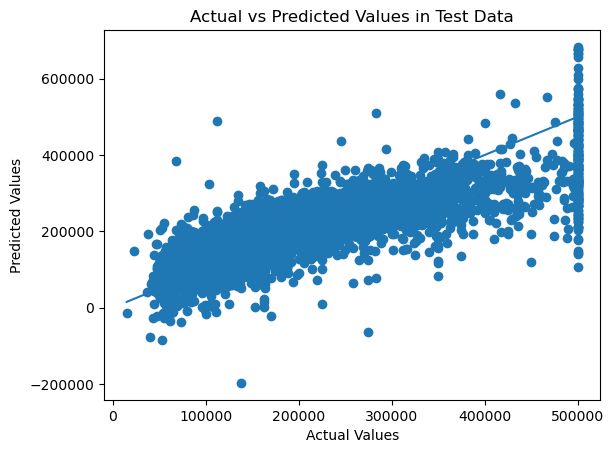

r^2: 0.6399236679243396


In [65]:
train_test_model(X_train, X_test, y_train, y_test, LinearRegression)

### Decision Tree Regression

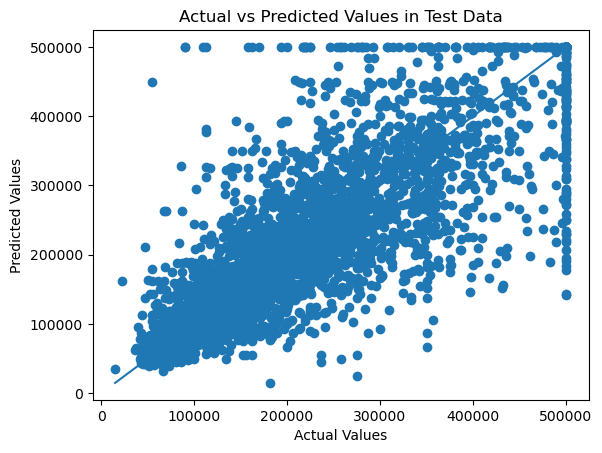

r^2: 0.6583265567107891


In [66]:
train_test_model(X_train, X_test, y_train, y_test, DecisionTreeRegressor)

### Random Forest Regression

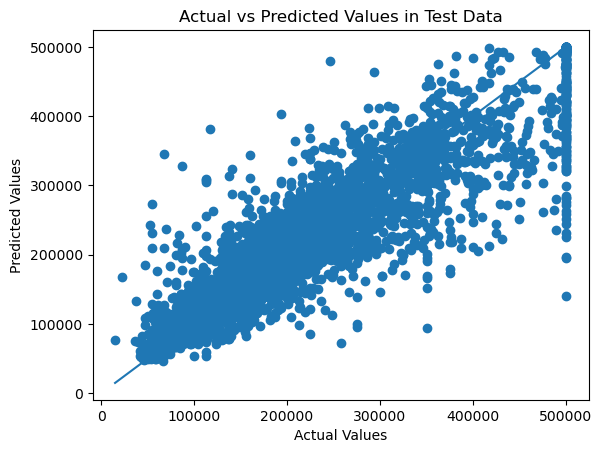

r^2: 0.8198016924017197


In [67]:
train_test_model(X_train, X_test, y_train, y_test, RandomForestRegressor)

### Extra Trees Regression

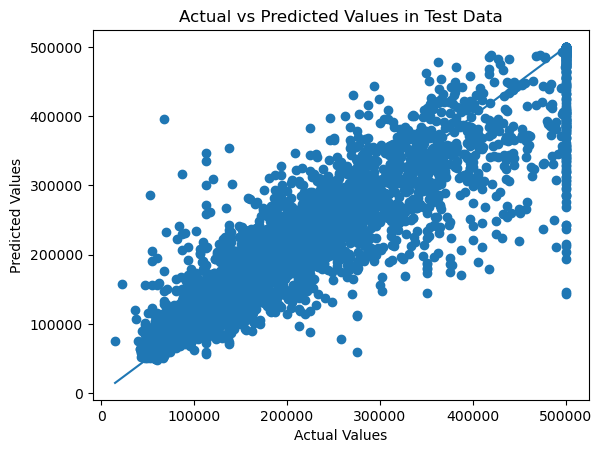

r^2: 0.804270663066686


In [68]:
train_test_model(X_train, X_test, y_train, y_test, ExtraTreesRegressor)

### Gradient Boosting Regression

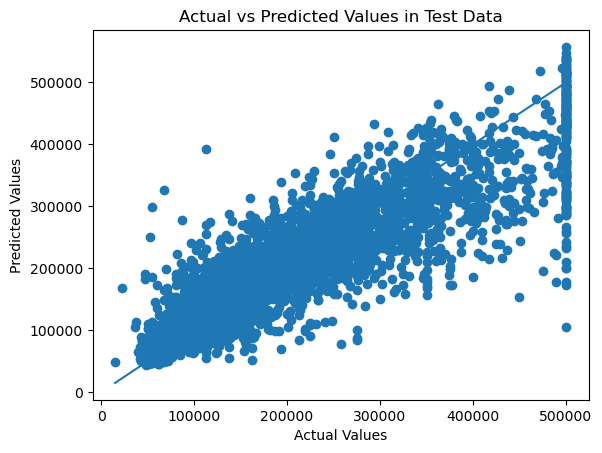

r^2: 0.7664629657905431


In [69]:
train_test_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor)

### Multi Layer Perceptron Regression

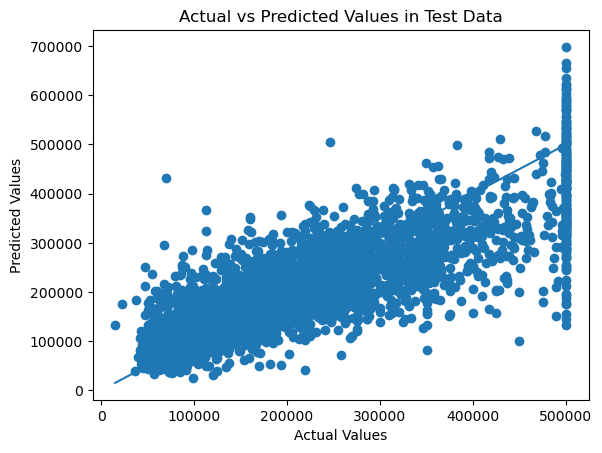

r^2: 0.6643943362102285


In [70]:
class NeuralNetworkExample(MLPRegressor):
    def __init__(self):
        super().__init__(hidden_layer_sizes=(128, 32, 16,), activation='relu', solver='adam', max_iter=1000, random_state=42)
train_test_model(X_train, X_test, y_train, y_test, NeuralNetworkExample)